In [1]:
%pwd

'/home/utente/Scrivania/Uni/NETWORK SCIENCE/csv_clusters'

In [7]:
#%cd csv_clusters/

/home/utente/Scrivania/Uni/NETWORK SCIENCE/csv_clusters


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
from scipy.sparse import csr_matrix
import random
import operator
import pylab
from operator import itemgetter

In [14]:
import powerlaw
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from collections import Counter

In [26]:
def compute_c(gamma,k_min):
    return (gamma-1)*k_min**(-(gamma-1))
compute_c(3,3)

0.2222222222222222

## Upload file: nodes and edges

In [15]:
nodelist = pd.read_csv("cluster5_nodes.csv")
nodes = []
for index, row in nodelist.iterrows():
    node_tuple = (row['Id'],row['Label']) 
    nodes.append(node_tuple)
    
    
    
edgelist = pd.read_csv("cluster5_edges.csv") 
edges = []
for index, row in edgelist.iterrows():
    edge = [row['Source'], row['Target'], row['Weight']]
    edges.append(edge)

In [16]:
# creation of the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

In [17]:
G

## sparse_matrix

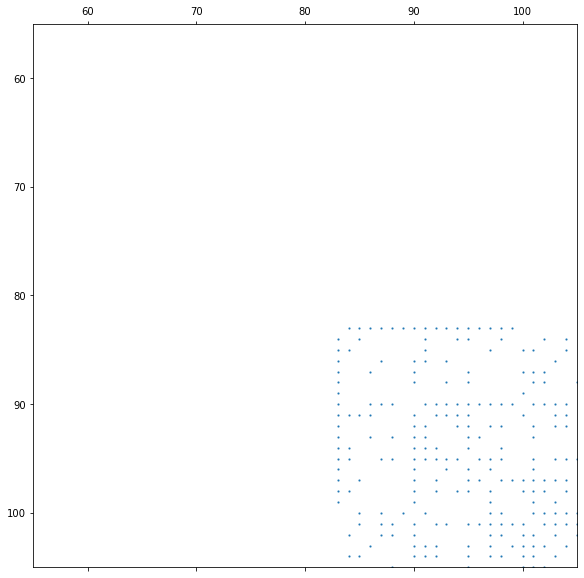

In [18]:
test=nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')
#test_t=test.T
from matplotlib.pyplot import figure, show
import numpy

fig,ax = plt.subplots(1, 1,figsize=(15,10))



# display the matrix
plt.spy(test, markersize=1)
ax.set_xlim(55,105)
ax.set_ylim(55,105)
ax.invert_yaxis()
plt.savefig('cluster1.jpg')
#plt.savefig('destination_path.eps', format='eps')


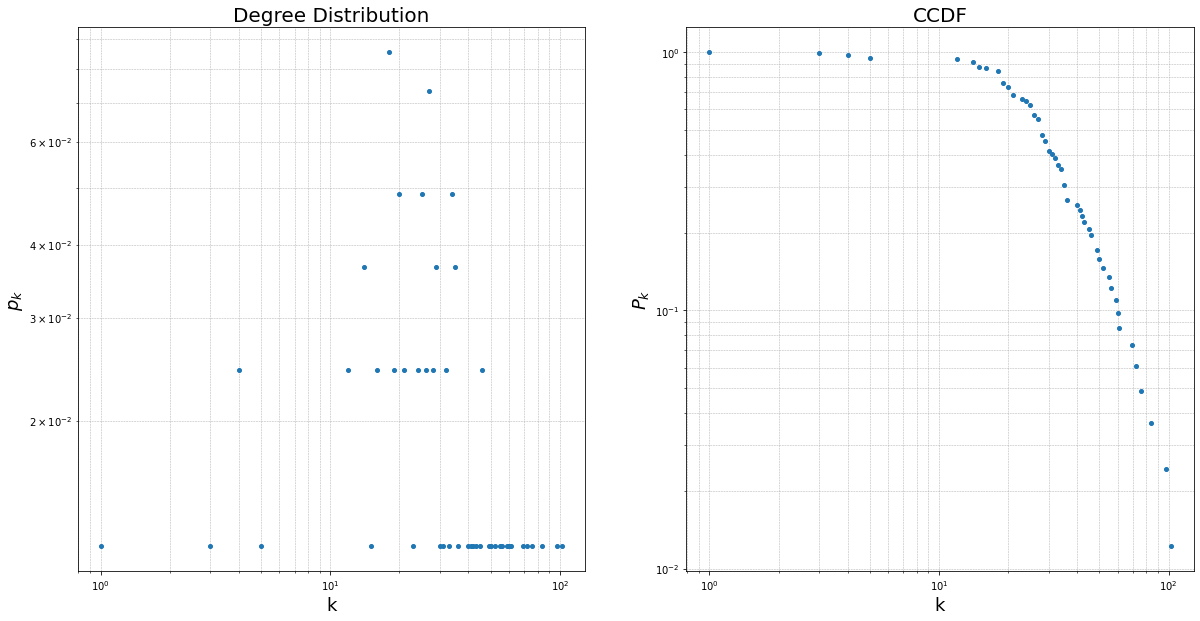

In [19]:
which_deg = 0 # 0=out degree, 1=in degree
d = np.sum(test, which_deg) # out degree for each node
d = np.squeeze(np.asarray(d)) # from matrix to array
d = d[d>0] # avoid zero degree
sorted_d = sorted(d)
occurrence = Counter(sorted_d)
x = list(Counter(occurrence).keys())
y = list(Counter(occurrence).values())
y = y/np.sum(y)

Pk = 1 - np.cumsum(y) # complementary cumulative

# set the last value of Pk (that is equal to 0 
# and generates problems when plotting in the log-scale) 
# equal to 1 and sort Pk in decreasing order to put 
# the 1 at the beginning of the array
Pk[-1] = 1 
Pk = sorted(Pk, reverse = True)

fig,ax = plt.subplots(1, 2,figsize=(20,10))
ax[0].loglog(x, y, 'o', markersize = 4)
ax[0].grid(which='both', linestyle='--', linewidth=0.5)
ax[0].set_title("Degree Distribution", size = 20)
ax[0].set_xlabel("k", size = 18)
ax[0].set_ylabel("$p_{k}$", size = 18)

ax[1].loglog(x, Pk, 'o', markersize = 4)
ax[1].grid(which='both', linestyle='--', linewidth=0.5)
ax[1].set_title("CCDF", size = 20)
ax[1].set_xlabel("k", size = 18)
ax[1].set_ylabel("$P_{k}$", size = 18)
plt.savefig('degree_plot.jpg') #uncomment this to save
plt.show()


## Mean degree/Variance/Some parameters

In [20]:
min(x)

1

In [21]:
import scipy as sp
from scipy import stats
#stats.moment(x, moment = 3) #variance
k_mean=sum(x)/(len(x))

dummy=[]
for i in x:
    
    dummy.append((i-k_mean)**2)
variance=sum(dummy)/(len(x))

In [22]:
print("mean",k_mean)
print("varance",variance)

mean 38.26086956521739
varance 557.8884688090736


In [23]:
print("second moment",variance+k_mean**2)

second moment 2021.782608695652


In [12]:
33741.747191011236-k_mean**2

32277.853051124657

## Graph's info

In [13]:
print(nx.info(G))

Graph with 778 nodes and 18349 edges


## Density of the graph

In [38]:
print("Graph density:", nx.density(G))

Graph density: 0.07605321507760532


## Degree distribution

## Gamma estinamation

In [15]:
def compute_gamma(G):
    degrees = [val for (node, val) in G.degree()]
    fit = powerlaw.Fit(degrees)
    gamma = fit.alpha
    return gamma

In [16]:
gamma=compute_gamma(G)
print(gamma)

Calculating best minimal value for power law fit
4.022943702860115%


Values less than or equal to 0 in data. Throwing out 0 or negative values


## Assortativity: copy and paste from wiki

The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes.

The assortativity coefficient is given by 
${\displaystyle r={\frac {\sum _{jk}{jk(e_{jk}-q_{j}q_{k})}}{\sigma _{q}^{2}}}}$

Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, r lies between −1 and 1. When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.

In [39]:
nx.degree_assortativity_coefficient(G)

-0.13689453602782595

## Centrality measures

In [21]:

def page_rank(G):
    alpha = 0.9
    pr = nx.pagerank(G, alpha)
    page_rn = pd.DataFrame(pr.items(), columns = ["Nodes", "pagerank"])
    page_rn.sort_values(by=['pagerank'], ascending=False, inplace=True)
    return page_rn
def betweenness(G):
    bet = nx.betweenness_centrality(G)
    return bet

def deg_centrality(G):
    deg_centr = nx.degree_centrality(G)
    return deg_centr
def closness_centrality(G):
        close_centr = nx.closeness_centrality(G)
        return close_centr


# Test Page rank

In [22]:
valori=page_rank(G)

In [23]:
len(valori)

165

In [24]:
valori.head()

,Nodes,pagerank
108,shoes,0.033175
123,style,0.031387
131,ebay,0.027524
110,vintage,0.024548
134,sale,0.023428


In [25]:
valori=valori["pagerank"].values

In [26]:
which_deg = 0 # 0=out degree, 1=in degree
d = np.sum(test, which_deg) # out degree for each node
d = np.squeeze(np.asarray(d)) # from matrix to array
d = d[d>0] # avoid zero degree
sorted_d = sorted(d)
occurrence = Counter(sorted_d)
x = list(Counter(occurrence).keys())
y = list(Counter(occurrence).values())
valori_x=np.array(y)
print(valori_x.shape)


(46,)


In [27]:
#valori = np.sort(valori)[::-1]
valori=valori[0:len(valori_x)]
valori.shape

(46,)

In [28]:
valori=valori/np.sum(valori)

In [29]:
np.sum(valori)

0.9999999999999999

In [30]:
normalized_x = y/np.sum(y)
#normalized_x= valori_x/np.linalg.norm(valori_x)
#normalized_x=np.unique(normalized_x)
normalized_x = np.sort(normalized_x)[::-1]

In [31]:
dummy=0.08
x_prova=np.linspace(0,dummy,100)
y_prova=x_prova

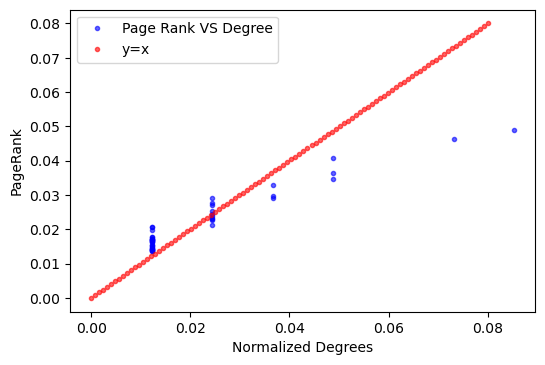

In [32]:
plt.figure(1, dpi = 100)
params = {'mathtext.default': 'regular',
              "axes.titlesize" : "18",
              "axes.labelsize" : "10",
              "xtick.labelsize" : "10",
              "ytick.labelsize" : "10",
         'figure.autolayout': True}          
plt.rcParams.update(params)
plt.xlabel(r"Normalized Degrees")
plt.ylabel(r"PageRank")
plt.plot(normalized_x, valori, "b.", alpha = 0.6, linewidth = 0.1)
plt.plot(x_prova,y_prova, "r.", alpha = 0.6, linewidth = 0.1)
plt.title('')
plt.legend(["Page Rank VS Degree","y=x"])
#plt.xlim(0,dummy)
#plt.ylim(0,dummy)
plt.savefig("Page Rank VS Degree green.jpg")

# HITS

In [33]:
h,a=nx.hits(G)

In [34]:
data_items = a.items()
data_list = list(data_items)

autor = pd.DataFrame(data_list)

len(autor)

165

In [35]:
autor[80:90]

,0,1
80,"(vintagefashion, vintagefashion)",-0.000000
81,"(vintageshop, vintageshop)",-0.000000
82,"(vintagestyle, vintagestyle)",-0.000000
83,3stripes,0.004951
84,canvas,0.007086
85,drip,0.007603
86,adidasshoes,0.006699
87,original,0.008351
88,threestripes,0.006996
89,adidas,0.001002


In [36]:
buono =autor.iloc[:,[1]]

In [37]:
buono=buono.values.tolist()
buono=buono[83:]
print(len(buono))

82


In [38]:
valori=page_rank(G)
valori=valori["pagerank"].values
valori=valori[0:82]

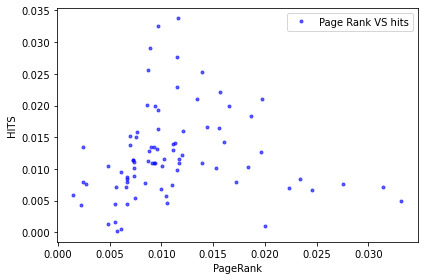

In [39]:
# plt.figure(1, dpi = 100)
params = {'mathtext.default': 'regular',
              "axes.titlesize" : "18",
              "axes.labelsize" : "10",
              "xtick.labelsize" : "10",
              "ytick.labelsize" : "10",
         'figure.autolayout': True}          
plt.rcParams.update(params)
plt.xlabel(r"PageRank")
plt.ylabel(r"HITS")
plt.plot( valori,buono, "b.", alpha = 0.6, linewidth = 0.1)
#plt.title('Page Rank VS hits')
plt.legend(["Page Rank VS hits"])
#plt.xlim(0,dummy)
#plt.ylim(0,dummy)
plt.savefig("Page Rank VS HITS.jpg")

## Robustness

In [40]:
def random_failures(G):
        g = G.copy()
        l = [(node, 0) for node in g.nodes()]
        random.shuffle(l)
        x = []
        y = []
        largest_component = max(nx.connected_components(g), key=len)
        n = len(g.nodes())
        x.append(0)
        y.append(len(largest_component)*1./n)
        R = 0.0
        for i in range(1, n):
            g.remove_node(l.pop(0)[0])
            largest_component = max(nx.connected_components(g), key=len)
            x.append(i*1./n)
            R += len(largest_component) * 1./n
            y.append(len(largest_component)*1./n)
        return x, y, 0.5 - R /n
    
def robustness_to_attacks(G, recalculate=False):
    g = G.copy()
    m = nx.betweenness_centrality(g)
    l = sorted(m.items(), key=operator.itemgetter(1), reverse=True)
    x = []
    y = []
    largest_component = max(nx.connected_components(g), key=len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = nx.betweenness_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
            largest_component = max(nx.connected_components(g), key = len)
            x.append(i * 1. / n)
            R += len(largest_component) * 1. / n
            y.append(len(largest_component) * 1. / n)
    return x, y, 0.5 - R / n

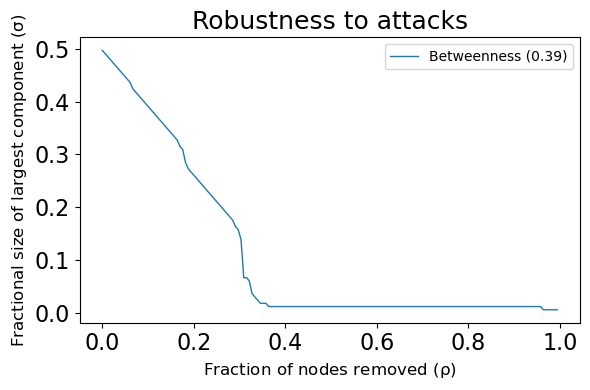

In [41]:
x2, y2, VB = robustness_to_attacks(G,True)
plt.figure(1, dpi = 100)
params = {'mathtext.default': 'regular',
              "axes.titlesize" : "18",
              "axes.labelsize" : "12",
              "xtick.labelsize" : "16",
              "ytick.labelsize" : "16",
          'figure.autolayout': True} 
plt.rcParams.update(params)
plt.xlabel(r"Fraction of nodes removed ($\rho$)")
plt.ylabel(r"Fractional size of largest component ($\sigma$)")
plt.plot(x2, y2, "-", linewidth = 1)
#pylab.plot(x2, y2, ":k", alpha = 0.6, linewidth = 0.5)
plt.title('Robustness to attacks')
plt.legend(["Betweenness ({:1.2f})".format(VB)])
plt.savefig("robustnesstoattack_green.jpg")

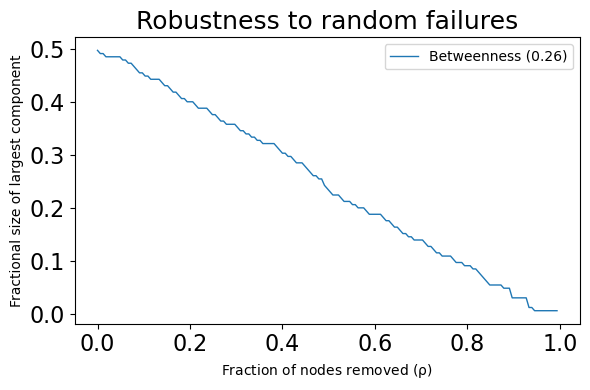

In [42]:
removed_nodes, fractional_size_connected_components, VB = random_failures(G)
plt.figure(1, dpi = 100)
params = {'mathtext.default': 'regular',
              "axes.titlesize" : "18",
              "axes.labelsize" : "10",
              "xtick.labelsize" : "16",
              "ytick.labelsize" : "16",
         'figure.autolayout': True}          
plt.rcParams.update(params)
plt.xlabel(r"Fraction of nodes removed ($\rho$)")
plt.ylabel(r"Fractional size of largest component")
plt.plot(removed_nodes, fractional_size_connected_components, "-", linewidth = 1)
#plt.plot(removed_nodes, fractional_size_connected_components, "ro-", alpha = 0.1, linewidth = 0.1)
plt.title('Robustness to random failures')
plt.legend(["Betweenness ({:1.2f})".format(VB)])
plt.savefig("robustnesstorandom_green.jpg")